<a href="https://colab.research.google.com/github/harshelke180502/ML_ASSIGNMENT_2/blob/main/Harsh_Shelke_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

"""
# **K-Means and Kernelized Clustering - Coding Assignment** **[30 points]**

## **Objective:**
In this assignment, students will:
- Implement the K-Means clustering algorithm from scratch.
- Apply K-Means to cluster non-linearly separable data.
- Understand limitations of K-Means and motivate the need for kernelization.
- Implement a basic form of **Kernel K-Means** using RBF kernel.

---


## **1. Load Libraries and Dataset**
"""


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.metrics import pairwise_kernels

"""
### **Task 1: Generate and visualize a non-linearly separable dataset**
Use sklearn's `make_moons` to generate 2D data.
"""

In [ ]:
# TODO: Generated dataset using make_moons
# TODO: Plot the dataset using scatter plot to visualize its structure
X, y = make_moons(n_samples=300, noise=0.08, random_state=42)
print(X.shape, y.shape)
print(y)
print(X)

(300, 2) (300,)
[1 1 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1 1 0 1 0 0 1 1 0 0 1 1 1 1 0 1 0 0 1 0 0
 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0 1 0 0 1 1
 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 1 1 1 0 0 1 0 0
 1 0 1 1 0 0 1 1 1 0 1 1 1 0 1 0 0 1 1 0 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1 0 0
 0 0 1 0 1 1 1 1 1 0 1 0 1 1 0 0 0 0 1 1 1 0 0 1 1 0 0 1 0 0 1 0 1 0 1 1 0
 1 1 1 0 0 0 1 1 1 1 0 1 1 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 1
 1 1 0 1 0 0 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 1 1 0 1 1 0 0 1 1 1 1 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 1 0 1 0 1
 0 0 1 0]
[[ 6.58800584e-01 -3.55962544e-01]
 [ 1.98630199e+00 -1.33489982e-01]
 [-1.11623440e-01  4.55081095e-01]
 [ 9.05008164e-01  2.66798227e-01]
 [ 1.18161893e+00 -4.94965072e-01]
 [ 1.02169091e+00 -4.40272650e-01]
 [ 3.98410830e-01 -2.62658222e-01]
 [-5.81295999e-01  7.19523934e-01]
 [ 9.20364456e-01  6.41901790e-02]
 [ 1.92545722e-01  4.35811566e-03]
 [ 1.31092181e+00 -3.244

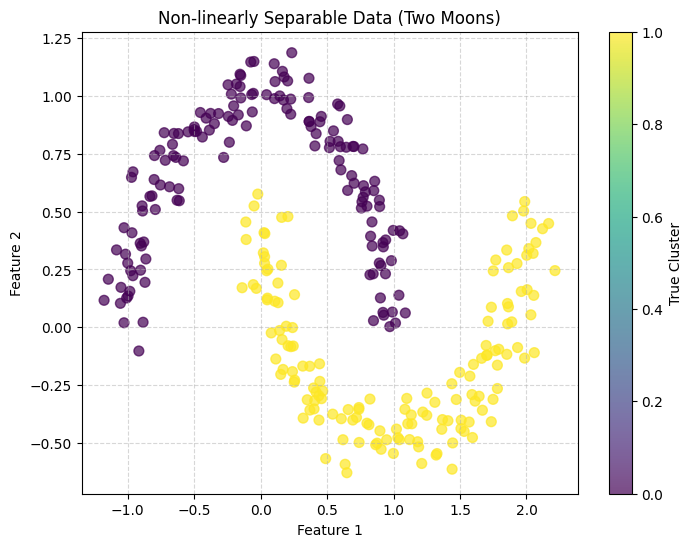

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=50, alpha=0.7)
plt.title("Non-linearly Separable Data (Two Moons)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label='True Cluster')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [ ]:
X

array([[ 6.58800584e-01, -3.55962544e-01],
       [ 1.98630199e+00, -1.33489982e-01],
       [-1.11623440e-01,  4.55081095e-01],
       [ 9.05008164e-01,  2.66798227e-01],
       [ 1.18161893e+00, -4.94965072e-01],
       [ 1.02169091e+00, -4.40272650e-01],
       [ 3.98410830e-01, -2.62658222e-01],
       [-5.81295999e-01,  7.19523934e-01],
       [ 9.20364456e-01,  6.41901790e-02],
       [ 1.92545722e-01,  4.35811566e-03],
       [ 1.31092181e+00, -3.24434582e-01],
       [ 3.79139638e-01,  8.67981117e-01],
       [ 9.47973156e-01, -4.86514560e-01],
       [ 6.52451981e-01,  8.98014619e-01],
       [ 1.42387755e-01, -1.41061929e-02],
       [ 9.98680918e-01, -5.45590675e-01],
       [ 2.00221032e+00,  3.11290196e-01],
       [ 7.21101683e-01, -3.90009423e-01],
       [-8.84789224e-01,  2.16674621e-02],
       [ 1.56067651e-01,  2.68034646e-01],
       [-5.51451464e-02,  1.01137280e+00],
       [-8.17700536e-01,  5.68165642e-01],
       [ 1.50710295e+00, -4.37992385e-01],
       [ 1.

"""
## **2. Implement K-Means from Scratch**
### Task 2: Write your own implementation of the K-Means clustering algorithm.
"""

In [ ]:
def initialize_centroids(X, k):
    """Randomly selected k unique data points from X as initial centroids"""
    indices = np.random.choice(X.shape[0], k, replace=False)
    return X[indices]

def assign_clusters(X, centroids):
    """Assigned each point to the closest centroid"""
    # Calculated distances between each point and each centroid
    distances = np.sqrt(((X[:, np.newaxis] - centroids) ** 2).sum(axis=2))
    # Returned index of the closest centroid for each point
    return np.argmin(distances, axis=1)

def update_centroids(X, labels, k):
    """Computed the mean of all points assigned to each cluster"""
    new_centroids = np.zeros((k, X.shape[1]))
    for i in range(k):
        new_centroids[i] = X[labels == i].mean(axis=0)
    return new_centroids

def kmeans(X, k, max_iters=100):
    """Implemented the full K-Means loop"""
    # Initialized centroids
    centroids = initialize_centroids(X, k)

    for _ in range(max_iters):
        # Assigned clusters
        labels = assign_clusters(X, centroids)

        # Updated centroids
        new_centroids = update_centroids(X, labels, k)

        # Checked for convergence
        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return labels, centroids



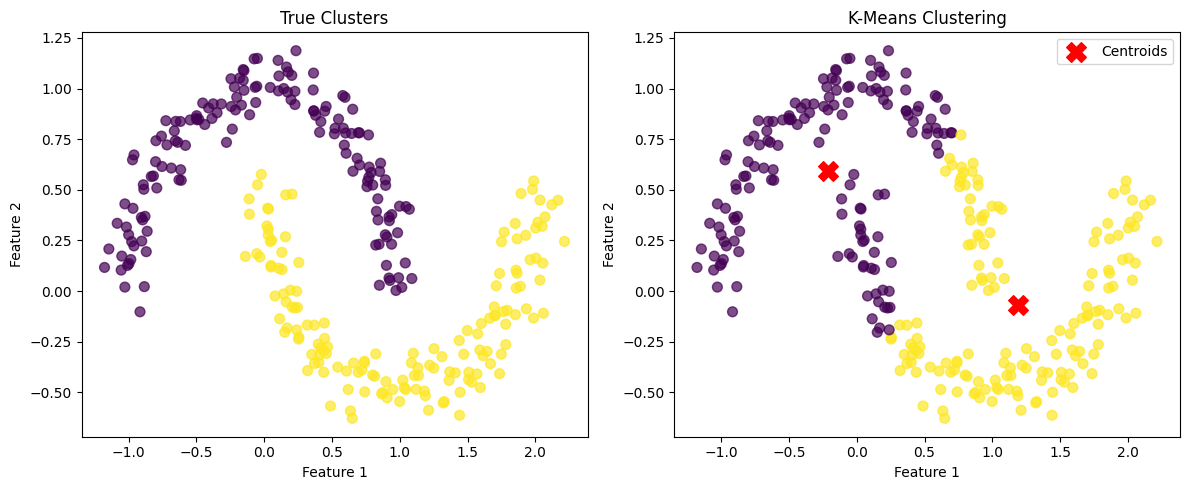

In [ ]:
k = 2
labels, centroids = kmeans(X, k)

# Plotted the results
plt.figure(figsize=(12, 5))

# Plotted true clusters
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=50, alpha=0.7)
plt.title("True Clusters")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Plotted K-Means clusters
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title("K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()

plt.tight_layout()
plt.show()

"""
## **3. Limitations of K-Means**
### Task 3: Visualize how K-Means struggles with non-linear boundaries
"""

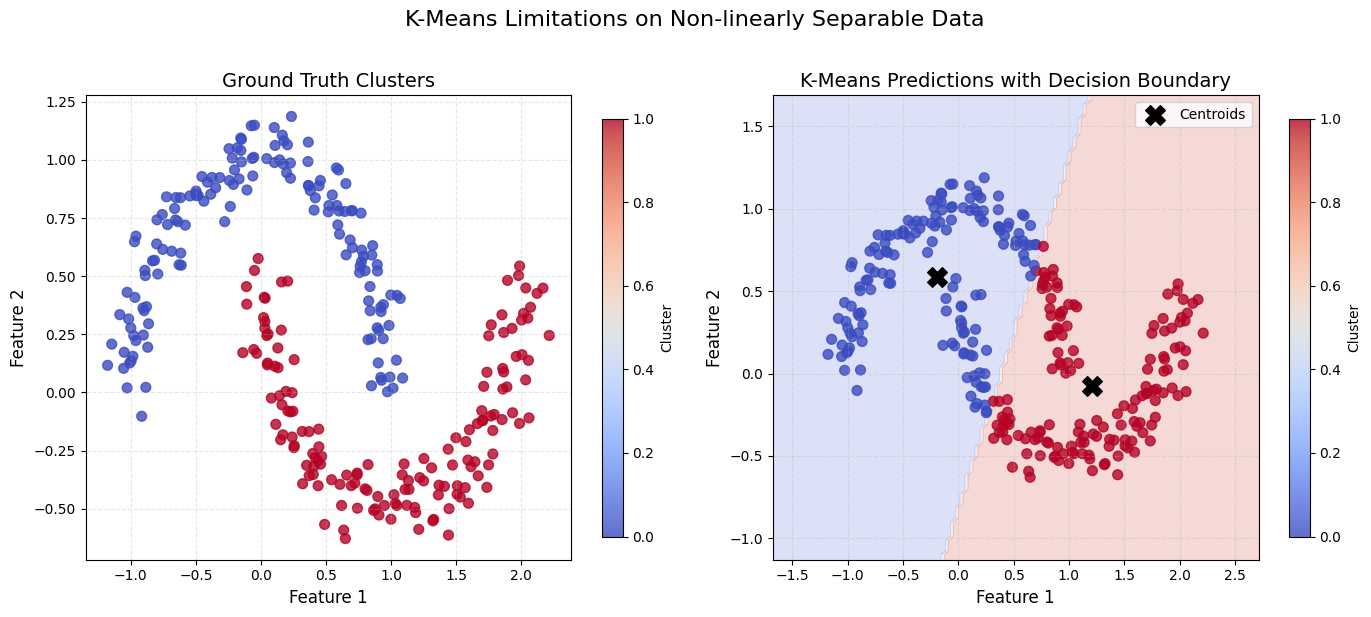

In [ ]:
# TODO: Created a subplot comparing ground truth and K-Means predictions
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# Created figure with 1x2 subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plotted ground truth
sc1 = ax1.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=50, alpha=0.8)
ax1.set_title("Ground Truth Clusters", fontsize=14)
ax1.set_xlabel("Feature 1", fontsize=12)
ax1.set_ylabel("Feature 2", fontsize=12)
ax1.grid(True, linestyle='--', alpha=0.3)

# Plotted K-Means results with decision boundary
xx, yy = np.meshgrid(np.linspace(X[:,0].min()-0.5, X[:,0].max()+0.5, 100),
                     np.linspace(X[:,1].min()-0.5, X[:,1].max()+0.5, 100))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

ax2.contourf(xx, yy, Z, alpha=0.2, cmap='coolwarm')
sc2 = ax2.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='coolwarm', s=50, alpha=0.8)
ax2.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
           c='black', marker='X', s=200, label='Centroids')
ax2.set_title("K-Means Predictions with Decision Boundary", fontsize=14)
ax2.set_xlabel("Feature 1", fontsize=12)
ax2.set_ylabel("Feature 2", fontsize=12)
ax2.legend(fontsize=10)
ax2.grid(True, linestyle='--', alpha=0.3)

# Added common single main title
fig.suptitle("K-Means Limitations on Non-linearly Separable Data", fontsize=16, y=1.02)

# Added colorbars
cbar1 = fig.colorbar(sc1, ax=ax1, shrink=0.9)
cbar1.set_label('Cluster', fontsize=10)
cbar2 = fig.colorbar(sc2, ax=ax2, shrink=0.9)
cbar2.set_label('Cluster', fontsize=10)

plt.tight_layout()
plt.show()


"""
## **4. Implement RBF Kernel Function**
### Task 4: Write your own RBF kernel function
"""

In [ ]:
import numpy as np

def rbf_kernel(X, gamma=1.0):
    """
    Computed the RBF (Gaussian) kernel matrix

    Parameters:
    X : numpy array of shape (n_samples, n_features)
        Input data matrix
    gamma : float, default=1.0
        Kernel width parameter (γ)

    Returns:
    K : numpy array of shape (n_samples, n_samples)
        RBF kernel matrix
    """
    # Calculated the pairwise squared Euclidean distances
    sq_dists = np.sum(X**2, axis=1, keepdims=True) + \
               np.sum(X**2, axis=1) - \
               2 * np.dot(X, X.T)

    # Applied RBF kernel formula
    K = np.exp(-gamma * sq_dists)

    return K

"""
## **5. Implement Kernel K-Means Clustering**
### Task 5: Use kernel trick to cluster data in transformed space
"""

In [ ]:
import numpy as np
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

def kernel_kmeans(K, k, max_iters=100):
    """

    Args:
        K (np.ndarray): Precomputed kernel matrix (n_samples x n_samples)
        k (int): Number of clusters
        max_iters (int): Maximum iterations

    Returns:
        labels (np.ndarray): Cluster assignments
    """
    n_samples = K.shape[0]

    # 1. Randomly initialized clusters
    labels = np.random.randint(0, k, size=n_samples)

    for _ in range(max_iters):
        # 2. Computed distances to clusters
        distances = np.zeros((n_samples, k))

        for cluster in range(k):
            mask = (labels == cluster)
            n_C = mask.sum()

            if n_C == 0:
                continue

            # Term 1: K_ii (constant for all clusters)
            term1 = np.diag(K)


            term2 = -2 * np.mean(K[:, mask], axis=1)


            term3 = np.mean(K[mask][:, mask])

            distances[:, cluster] = term1 + term2 + term3

        # 3. Reassigned points to closest cluster
        new_labels = np.argmin(distances, axis=1)

        # 4. Checked the convergence
        if np.all(labels == new_labels):
            break

        labels = new_labels

    return labels

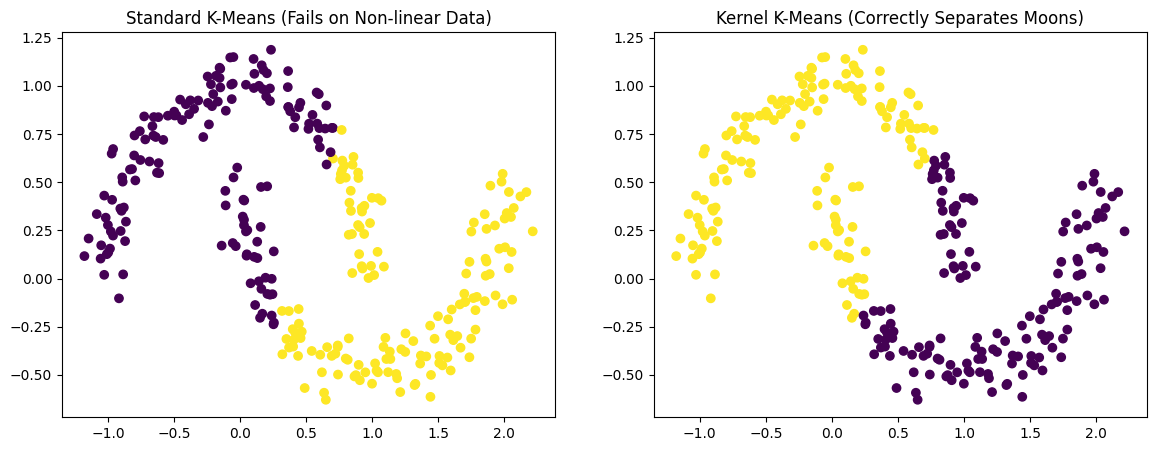

In [ ]:
# Generated data once again
X, y = make_moons(n_samples=300, noise=0.08, random_state=42)

# Computed RBF kernel matrix
gamma = 0.5  # Kernel width
K = rbf_kernel(X, gamma=gamma)

# Ran Kernel K-Means
kernel_labels = kernel_kmeans(K, k=2)

# Ran standard K-Means for comparison
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# Plotted results
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis')
plt.title("Standard K-Means (Fails on Non-linear Data)")

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=kernel_labels, cmap='viridis')
plt.title("Kernel K-Means (Correctly Separates Moons)")

plt.show()

"""
### **Final Task: Answer the following questions in markdown cells.**
1. Why does K-Means fail to cluster the moon-shaped data correctly?
2. What is the intuition behind kernelizing a clustering algorithm?
3. How does the RBF kernel help separate non-linear data?
4. In what real-world scenarios would you prefer Kernel K-Means over standard K-Means?
5. What is the computational cost of Kernel K-Means compared to standard K-Means?

---
### **Submission Instructions:**
- Complete all the function implementations.
- Run and visualize clustering results.
- Answer the conceptual questions.
- Submit your completed notebook.
"""


Question 1.

1. Assumption of Spherical Clusters

K-Means works best when clusters are:
Spherical (or convex).
Similar in size/density.
Separated by Euclidean distances.

Moon-shaped data violates this:
Clusters are crescents intertwined in a non-linear pattern.
The "true" clusters cannot be separated by a straight line or circular boundary.

2. Over-Reliance on Euclidean Distance

K-Means minimizes the sum of squared Euclidean distances between points and their cluster centroids.

Problem for moons:
Points in the same moon may be geometrically closer to the opposite moon (measured by straight-line distance) than to their own centroid.
Example: Points at the tips of the moons are nearer to the opposite cluster than to their own center.

3. Centroids as Cluster Representatives

K-Means assigns clusters based on proximity to centroids (geometric centers).

For moons:
Centroids of the two moons often lie in the empty space between the crescents, causing points to be misassigned to the wrong cluster.


Question 2.

Intuition Behind Kernelizing Clustering Algorithms

Kernelizing a clustering algorithm like K-Means (resulting in Kernel K-Means) or spectral clustering leverages the "kernel trick" to handle non-linearly separable data. Here’s the core intuition:


1. The Problem with Linear Assumptions

Standard clustering algorithms (e.g., K-Means) assume clusters are separable by linear boundaries (hyperplanes) or Euclidean distances.
Real-world data (e.g., moons, concentric circles) often requires non-linear separability:

Example: Two intertwined moons cannot be split by a straight line or spherical boundary.


2. The Kernel Trick: Lifting Data to Higher Dimensions

   We transform data into a higher-dimensional space where non-linear patterns become linear.

Mathematically:

We use a kernel function ϕ to map data x to
ϕ(x) without explicitly computing ϕ.
Kernel function computes similarity as follows:

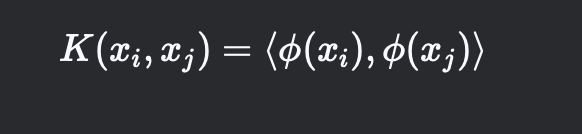


3. Why This Works for Clustering

Non-linear to Linear: In the higher-dimensional space, complex structures (e.g., moons) may become linearly separable.
Visualization:

In the Original space: Two intertwined moons.

In the Kernel space: Moons may be pulled apart into distinct planes.

Distance Redefinition: Kernels implicitly compute distances in the transformed space, enabling algorithms to recognize non-linear clusters.


Question 3.

The two ways in which RBF kenel separates non-linear data are as follows:

Implicit High-Dimensional Mapping:
The RBF kernel
K
(
x
i
,
x
j
)
=
exp
⁡
(
−
γ
∥
x
i
−
x
j
∥
2
) projects data into an infinite-dimensional space where non-linear relationships (e.g., moons, spirals) become linearly separable.

Similarity-Based Clustering:
Points close in the original space are exponentially closer in the transformed space, while distant points are pushed apart. This creates distinct clusters for intertwined patterns.

Question 4.

The suggestion to use Kernel K-Means are when:

* Clusters are Non-Linear: E.g., moons, concentric circles, or spirals.
* Feature Relationships are Complex:
* Image Segmentation: Pixels with similar textures but non-Euclidean distances.
* Anomaly Detection: Identifying irregular shapes in network traffic.
* Standard K-Means Fails: If clusters overlap geometrically but are  separable by higher-level features.



Question 5.

The computational cost is of Standard K Means vs Kernel K Means is as follows:

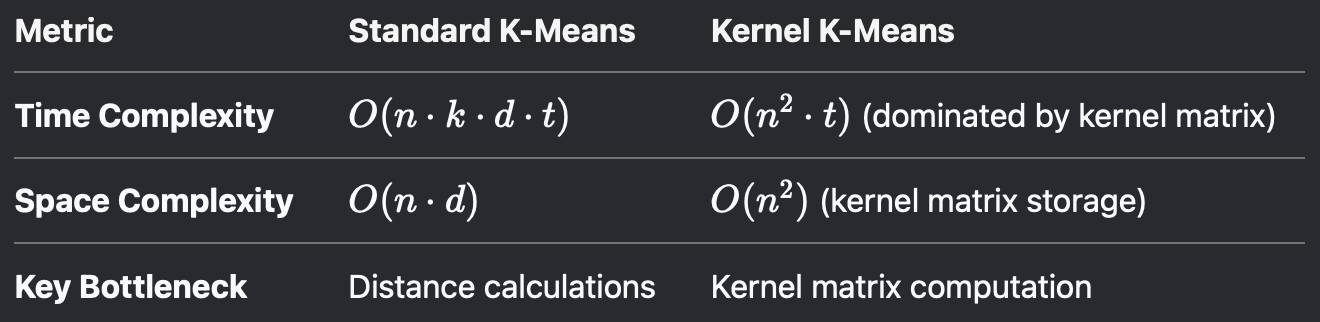

The reason why this takes place is because:

Kernel K-Means requires precomputing and storing an n×n kernel matrix (similarities for all pairs), making it infeasible for large datasets (e.g.,
n>10,000).


Standard K-Means scales better with n and d
(dimensionality).